### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


### Importing the Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

### Loading Dataset into test and train data

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [4]:
print("Shape of the training images data")
train_images.shape

Shape of the training images data


(50000, 32, 32, 3)

In [5]:
print("Shape of the testing images data")
test_images.shape

Shape of the testing images data


(10000, 32, 32, 3)

In [6]:
unique_labels = np.unique(train_labels)
print('Total number of unique classes:') 
len(unique_labels)


Total number of unique classes:


10

- **Training Images Shape**: (50,000, 32, 32, 3)
- **Testing Images Shape**: (10,000, 32, 32, 3)

The CIFAR-10 dataset consists of 60,000 32x32 color images across 10 classes. The training data contains 50,000 images while the test data contains 10,000 images. Each image has 3 color channels (RGB).

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']

Mapped the numeric labels (0–9) to their corresponding class names according to the official CIFAR-10 dataset specification for better visualisation and result interpretation. 

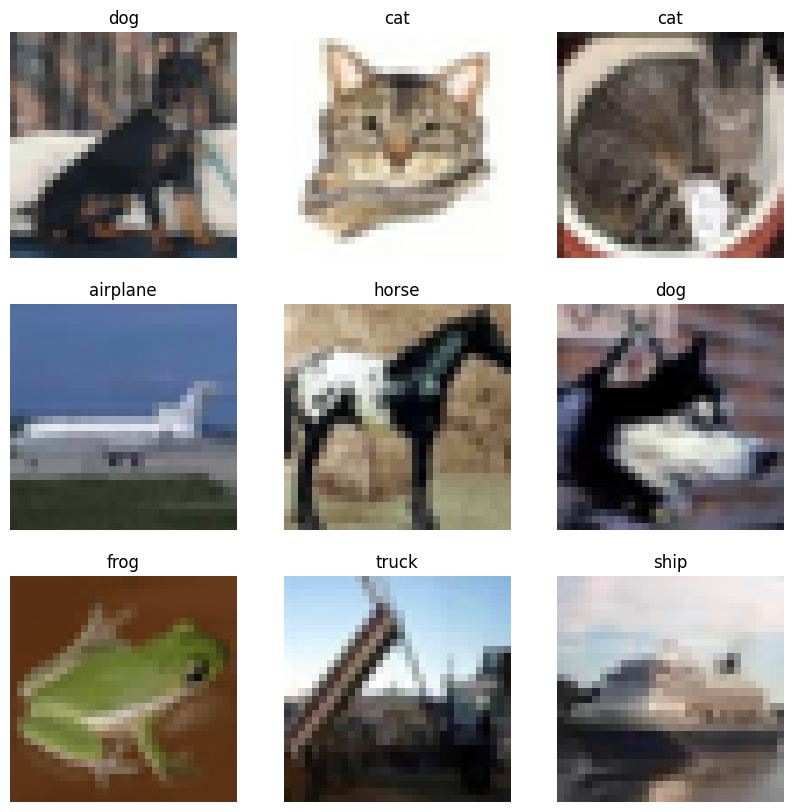

In [8]:
plt.figure(figsize=(10, 10)) 

for i in range(9):
    index = random.randint(0, len(train_images) - 1) 
    image = train_images[index]  
    label = train_labels[index][0]  

    plt.subplot(3, 3, i+1) 
    plt.imshow(image)  
    plt.title(class_names[label])
    plt.axis('off')  

plt.show()


Displaying random samples from the dataset to understand the image quality, variety and classes before applying preprocessing techniques.


In [9]:
random.seed(42)
index = random.randint(0, len(train_images) - 1)
original_image = train_images[index]
original_label = train_labels[index][0]
print(f"Index of selected image : {index}")
print(f"Class of selected image : {class_names[original_label]}")

Index of selected image : 41905
Class of selected image : truck


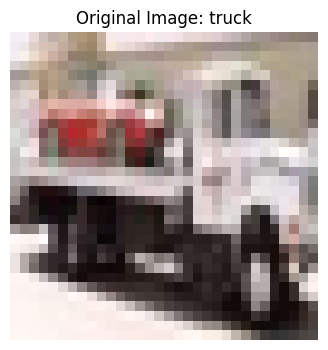

In [10]:
plt.figure(figsize=(4, 4))
plt.imshow(original_image)
plt.title(f"Original Image: {class_names[original_label]}")
plt.axis('off')
plt.show()

Selected one image using a random seed to ensure reproducibility. We will use this image to demonstrate all five preprocessing techniques.


### Normalization

-Normalization: Scales pixel values from [0, 255] to [0, 1] range.

-Purpose : Neural networks train better with smaller values.

In [11]:
normalized_image = original_image / 255.0
print("Original pixel range:", original_image.min(), "to", original_image.max())
print("Normalized pixel range:", normalized_image.min(), "to", normalized_image.max())

Original pixel range: 1 to 255
Normalized pixel range: 0.00392156862745098 to 1.0


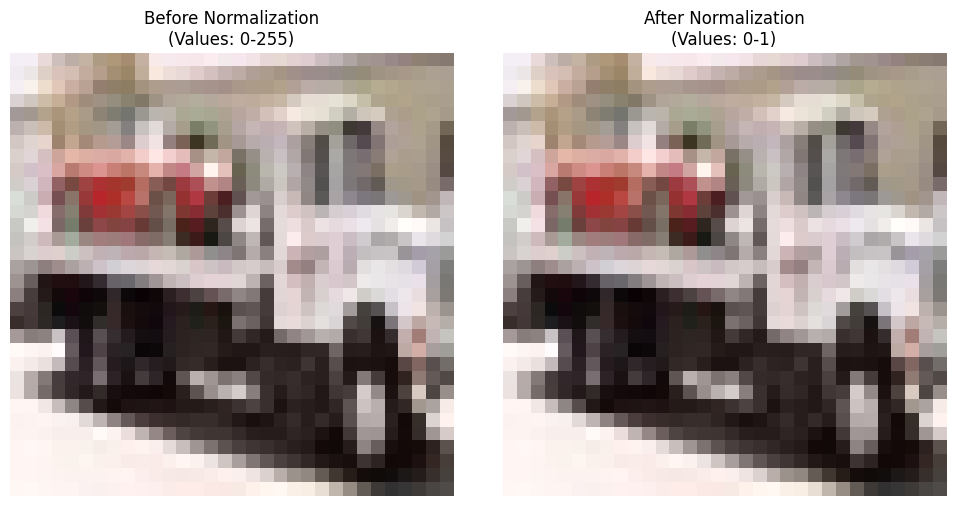

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image)
axes[0].set_title('Before Normalization\n(Values: 0-255)', fontsize=12)
axes[0].axis('off')

axes[1].imshow(normalized_image)
axes[1].set_title('After Normalization\n(Values: 0-1)', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

The normalization comparison shows that while the visual appearance remains the same the underlying pixel values are transformed from the [0, 255] range to [0, 1]. This preprocessing step is essential for neural network training as it ensures numerical stability, faster convergence and prevents gradient-related issues during backpropagation.


### Random Rotation

-Rnadom Rotation: Rotates images by random angles (±20 degrees).

-Purpose: Real-world objects in CIFAR-10 (airplanes, cars, animals) appear at different angles. Rotation augmentation increases dataset diversity, helps the model recognize objects regardless of orientation and prevents overfitting to specific orientations.

In [13]:
image_tensor = tf.expand_dims(original_image, axis=0) 

In [14]:
rotation_layer = tf.keras.layers.RandomRotation(factor=0.055)
rotated_tensor = rotation_layer(image_tensor, training=True)

In [15]:
rotated_image = rotated_tensor[0].numpy()


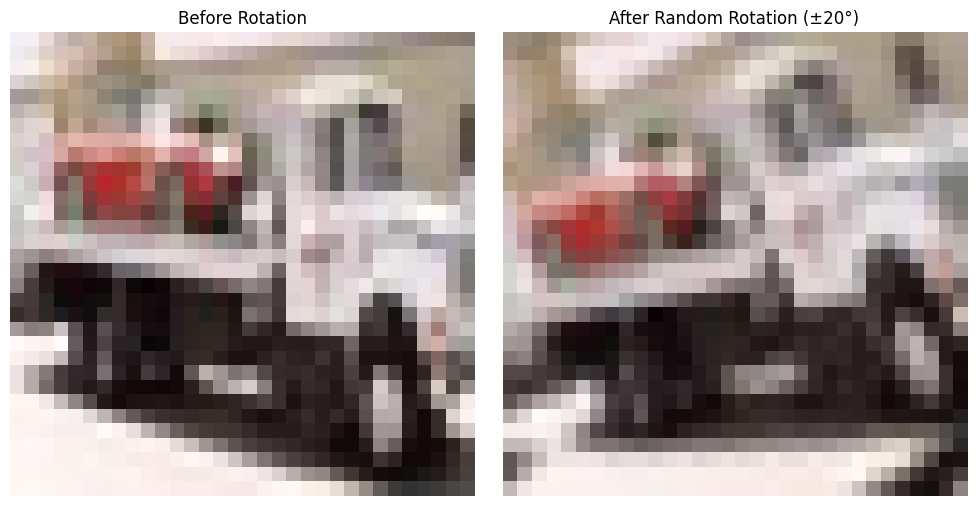

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image.astype('uint8'))
axes[0].set_title('Before Rotation', fontsize=12)
axes[0].axis('off')

axes[1].imshow(rotated_image.astype('uint8'))
axes[1].set_title('After Random Rotation (±20°)', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

The rotated image shows the object at a different angle while preserving all visual features. This augmentation helps the model learn that object identity is independent of orientation which improves recognition accuracy for objects photographed from various angles.


### Horizontal Flip

-Horizontal Flip: Mirrors images horizontally.

-Purpose: Many CIFAR-10 objects (cars, ships, animals) are valid when flipped. This doubles the effective dataset size which helps the model learn directional invariance and prevents bias toward objects facing a specific direction.



In [17]:
flipped_image = tf.image.flip_left_right(original_image).numpy()


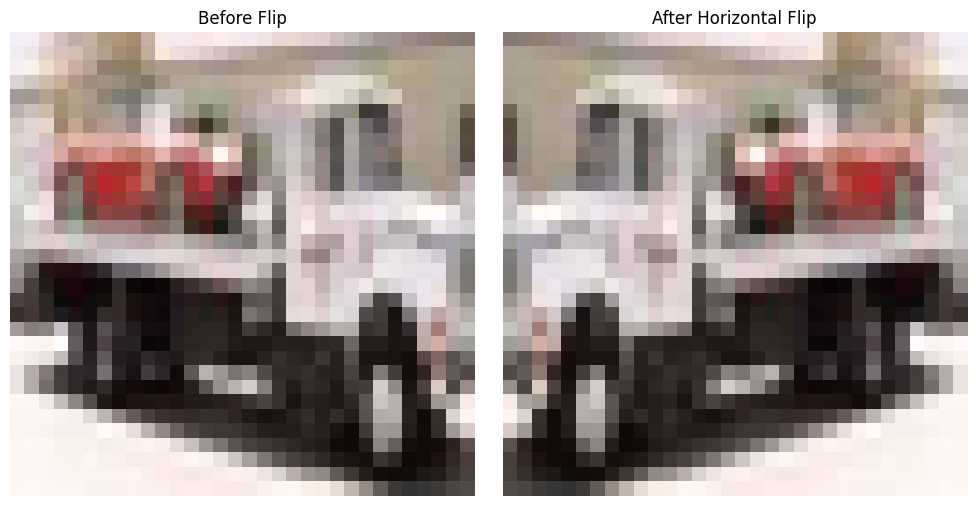

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image.astype('uint8'))
axes[0].set_title('Before Flip', fontsize=12)
axes[0].axis('off')

axes[1].imshow(flipped_image.astype('uint8'))
axes[1].set_title('After Horizontal Flip', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

The flipped image is a mirror reflection of the original. This augmentation teaches the model that object identity is independent of horizontal direction preventing directional bias in predictions.


### Resizing

-Resizing : Changes image dimensions from 32x32 to different sizes (e.g., 64x64 or 16x16).

-Purpose : CIFAR-10's 32x32 images are small. Resizing allows compatibility with pre-trained models that require larger inputs (e.g., 224x224) and shows the trade-off between image detail and processing speed.



In [19]:
resized_large = tf.image.resize(original_image, [64, 64]).numpy()

In [20]:
resized_small = tf.image.resize(original_image, [16, 16]).numpy()


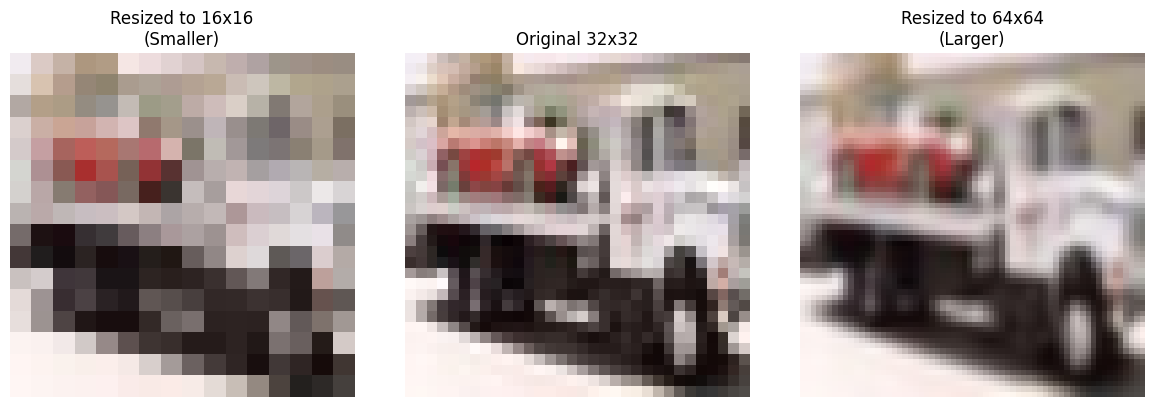

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(resized_small.astype('uint8'))
axes[0].set_title('Resized to 16x16\n(Smaller)', fontsize=12)
axes[0].axis('off')

axes[1].imshow(original_image.astype('uint8'))
axes[1].set_title('Original 32x32', fontsize=12)
axes[1].axis('off')

axes[2].imshow(resized_large.astype('uint8'))
axes[2].set_title('Resized to 64x64\n(Larger)', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

Resizing shows the trade-off between image quality and computational efficiency. Larger images (64x64) preserve more detail but require more processing power while smaller images (16x16) lose detail but train faster.


### Brightness Adjustment

-Brightness Adjustment: Adjusts image brightness to simulate different lighting conditions.

-Purpose: CIFAR-10 images have varying lighting conditions. Brightness adjustment makes the model robust to different illumination levels, simulates real-world lighting variations, and prevents the model from relying on brightness as a classification feature.



In [23]:
normalized = original_image / 255.0
brighter = tf.image.adjust_brightness(normalized, delta=0.3)
brighter = tf.clip_by_value(brighter, 0, 1).numpy()

In [24]:
darker = tf.image.adjust_brightness(normalized, delta=-0.3)
darker = tf.clip_by_value(darker, 0, 1).numpy()

In [25]:
print("Original range:", normalized.min(), "to", normalized.max())
print("Brighter range:", brighter.min(), "to", brighter.max())
print("Darker range:", darker.min(), "to", darker.max())

Original range: 0.00392156862745098 to 1.0
Brighter range: 0.30392158031463623 to 1.0
Darker range: 0.0 to 0.699999988079071


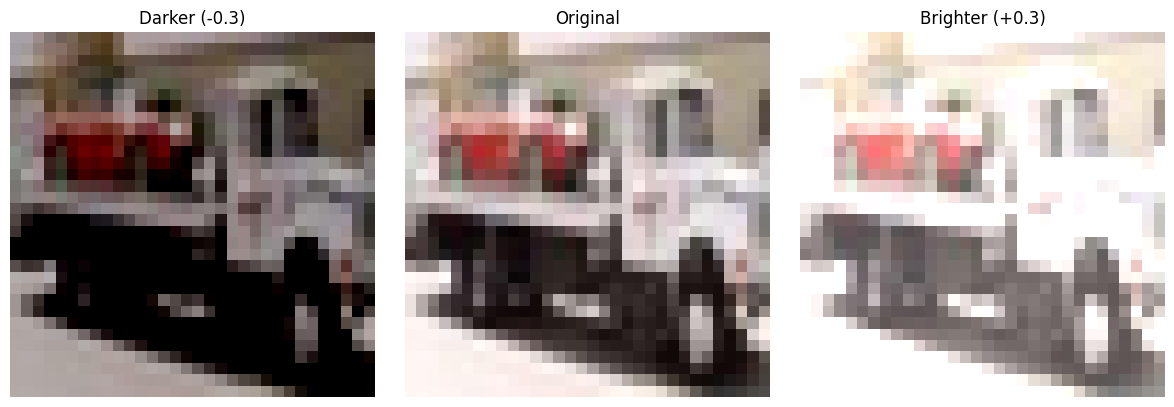

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(darker)
axes[0].set_title('Darker (-0.3)', fontsize=12)
axes[0].axis('off')

axes[1].imshow(normalized)
axes[1].set_title('Original', fontsize=12)
axes[1].axis('off')

axes[2].imshow(brighter)
axes[2].set_title('Brighter (+0.3)', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

Brightness adjustment simulates different lighting conditions while preserving object features. This ensures the model recognizes objects regardless of illumination improving real-world performance across various lighting scenarios.


### Visual Comparison of All Preprocessing Techniques

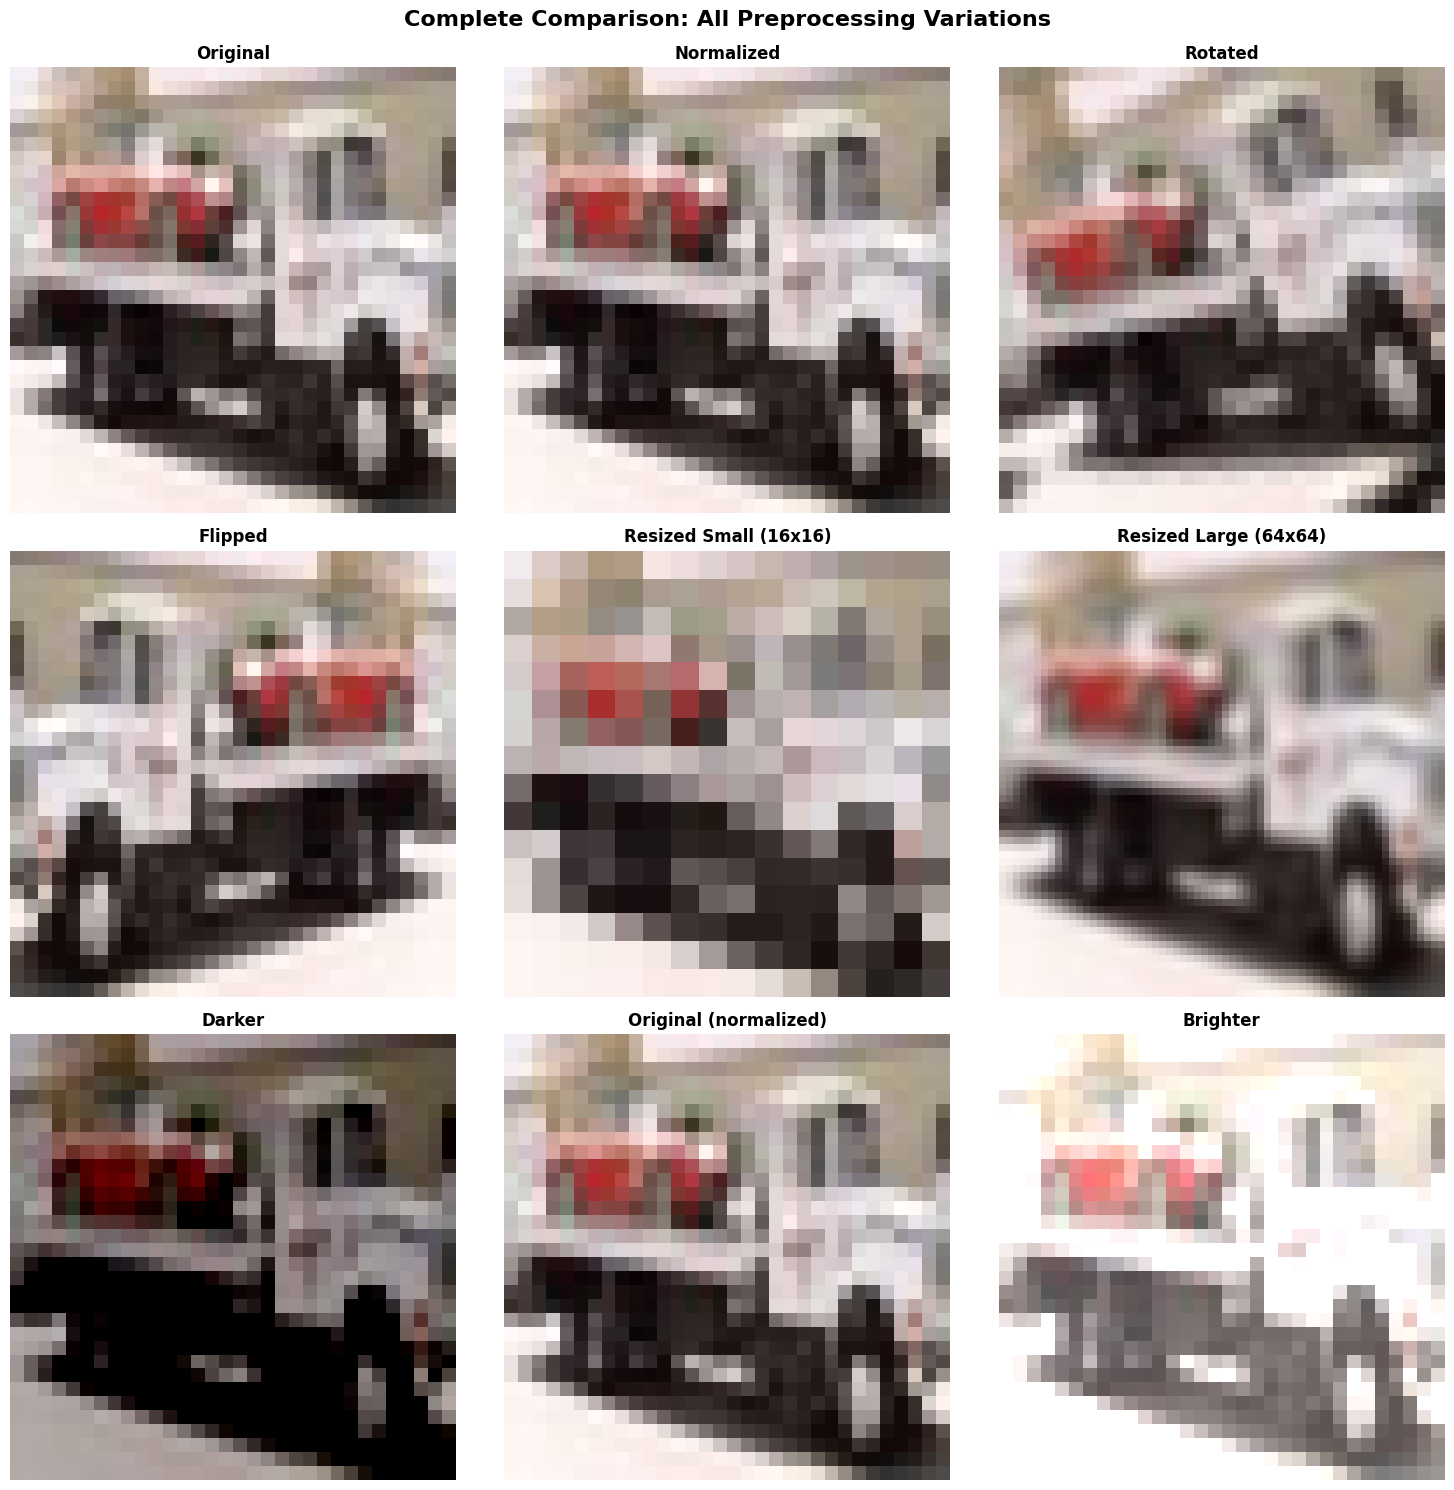

In [32]:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes[0, 0].imshow(original_image.astype('uint8'))
axes[0, 0].set_title('Original', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(normalized_image)
axes[0, 1].set_title('Normalized', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(rotated_image.astype('uint8'))
axes[0, 2].set_title('Rotated', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

axes[1, 0].imshow(flipped_image.astype('uint8'))
axes[1, 0].set_title('Flipped', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(resized_small.astype('uint8'))
axes[1, 1].set_title('Resized Small (16x16)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(resized_large.astype('uint8'))
axes[1, 2].set_title('Resized Large (64x64)', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

axes[2, 0].imshow(darker)
axes[2, 0].set_title('Darker', fontsize=12, fontweight='bold')
axes[2, 0].axis('off')

axes[2, 1].imshow(normalized_image)
axes[2, 1].set_title('Original (normalized)', fontsize=12, fontweight='bold')
axes[2, 1].axis('off')

axes[2, 2].imshow(brighter)
axes[2, 2].set_title('Brighter', fontsize=12, fontweight='bold')
axes[2, 2].axis('off')

plt.suptitle('Complete Comparison: All Preprocessing Variations', 
             fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()
plt.savefig('complete_comparison.png', dpi=150, bbox_inches='tight')
plt.show()


Side-by-side comparison of all five preprocessing techniques applied to the same CIFAR-10 image.


### Applying Techniques to Entire Training Dataset

In [27]:
train_images_normalized = train_images / 255.0

In [28]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.055),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomBrightness(0.3)
])